Data fetched successfully!
{
    "updated": 1746525257079,
    "cases": 704753890,
    "todayCases": 0,
    "deaths": 7010681,
    "todayDeaths": 0,
    "recovered": 675619811,
    "todayRecovered": 790,
    "active": 22123398,
    "critical": 34794,
    "casesPerOneMillion": 90413,
    "deathsPerOneMillion": 899.4,
    "tests": 7026505313,
    "testsPerOneMillion": 884400.59,
    "population": 7944935131,
    "oneCasePerPeople": 0,
    "oneDeathPerPeople": 0,
    "oneTestPerPeople": 0,
    "activePerOneMillion": 2784.59,
    "recoveredPerOneMillion": 85037.8,
    "criticalPerOneMillion": 4.38,
    "affectedCountries": 231
}

Initial DataFrame:
         updated      cases  todayCases   deaths  todayDeaths  recovered  \
0  1746525257079  704753890           0  7010681            0  675619811   

   todayRecovered    active  critical  casesPerOneMillion  ...       tests  \
0             790  22123398     34794               90413  ...  7026505313   

   testsPerOneMillion  population  on

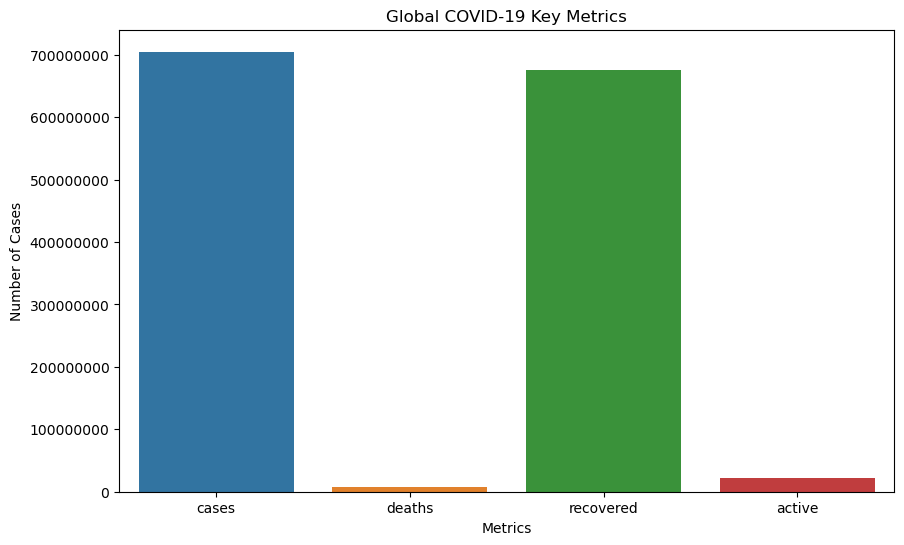

In [3]:
# ## Fetching Data

import requests
import pandas as pd
import json

# Replace with the actual API endpoint if you have one
api_url = "https://disease.sh/v3/covid-19/all"

try:
    response = requests.get(api_url)
    response.raise_for_status() # Raise an exception for bad status codes
    data = response.json()
    print("Data fetched successfully!")
    # Display a snippet of the fetched data
    print(json.dumps(data, indent=4))
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    data = None

# ## Data Processing

if data:
    df = pd.DataFrame([data])
    print("\nInitial DataFrame:")
    print(df.head())

    # Select relevant columns
    relevant_columns = ['cases', 'deaths', 'recovered', 'active', 'tests', 'population', 'affectedCountries']
    df_processed = df[relevant_columns]
    print("\nProcessed DataFrame:")
    print(df_processed.head())

    # You can add more data cleaning and preprocessing steps here,
    # such as handling missing values or transforming data types.

# ## Exploratory Data Analysis (EDA)

if data:
    print("\n--- Exploratory Data Analysis ---")

    print(f"\nTotal Cases: {df_processed['cases'].values[0]:,}")
    print(f"Total Deaths: {df_processed['deaths'].values[0]:,}")
    print(f"Total Recovered: {df_processed['recovered'].values[0]:,}")
    print(f"Total Active Cases: {df_processed['active'].values[0]:,}")
    print(f"Total Tests Conducted: {df_processed['tests'].values[0]:,}")
    print(f"Global Population: {df_processed['population'].values[0]:,}")
    print(f"Number of Affected Countries: {df_processed['affectedCountries'].values[0]}")

    # You can add more EDA here, like calculating recovery rates, mortality rates, etc.

# ## Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

if data:
    print("\n--- Data Visualization ---")

    # Example: Bar plot of key metrics
    metrics = ['cases', 'deaths', 'recovered', 'active']
    values = df_processed[metrics].values[0]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics, y=values)
    plt.title('Global COVID-19 Key Metrics')
    plt.ylabel('Number of Cases')
    plt.xlabel('Metrics')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()